# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [ ]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [ ]:
for link in soup.find_all('a'):
    print(link.get('href'))

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2019/01/18/Saturn-rings-are-young',
 '/news/2019/01/18/nubike',
 '/news/2019/01/18/sleeping-in-on-stillbirth',
 '/news/2019/01/18/biorepellent',
 '/news/2019/01/18/ancient-life-in-lake-mercer',
 '/news/2019/01/18/pain-is-unpleasant',
 '/news/2019/01/18/drug',
 '/news/2019/01/18/artificial-meteor-showers',
 '/news/2019/01/18/lowfreq',
 '/news/2019/01/18/Oldest-periodic-table',
 '/news/2019/01/18/so-many-golf-balls',
 '/news/2019/01/17/3D-printed-microstructure',
 '/news/2019/01/17/leak',
 '/news/2019/01/17/genes',
 '/news/2019/01/17/activity-tracker',
 '/news/2019/01/17/antivaxxers-top-threat',
 '/news/2019/01/17/dexnet',
 '/news/2019/01/17/orobates-gate',
 '/news/2019/01/17/semen-treatment',
 '/news/2019/01/09/discrete-space-time',
 '/news/2019/01/16/acoustic-Chern',
 '/news/2019/01/14/hawking-optic',
 '/news/2019/01/08/irisin-helps',
 '/news/2019/01/16/optomechanical-Kerker',
 '/news/2019/01/09/cancer-brillouin',
 '/news/2019/01/14/antispiral',
 '/news/2019/01/18/pain-is-unple

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [7]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2019/01/18/Saturn-rings-are-young',
 'https://nplus1.ru/news/2019/01/18/nubike',
 'https://nplus1.ru/news/2019/01/18/sleeping-in-on-stillbirth',
 'https://nplus1.ru/news/2019/01/18/biorepellent',
 'https://nplus1.ru/news/2019/01/18/ancient-life-in-lake-mercer',
 'https://nplus1.ru/news/2019/01/18/pain-is-unpleasant',
 'https://nplus1.ru/news/2019/01/18/drug',
 'https://nplus1.ru/news/2019/01/18/artificial-meteor-showers',
 'https://nplus1.ru/news/2019/01/18/lowfreq',
 'https://nplus1.ru/news/2019/01/18/Oldest-periodic-table',
 'https://nplus1.ru/news/2019/01/18/so-many-golf-balls',
 'https://nplus1.ru/news/2019/01/17/3D-printed-microstructure',
 'https://nplus1.ru/news/2019/01/17/leak',
 'https://nplus1.ru/news/2019/01/17/genes',
 'https://nplus1.ru/news/2019/01/17/activity-tracker',
 'https://nplus1.ru/news/2019/01/17/antivaxxers-top-threat',
 'https://nplus1.ru/news/2019/01/17/dexnet',
 'https://nplus1.ru/news/2019/01/17/orobates-gate',
 'https://nplus1.ru/ne

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [8]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [9]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2019-01-18" itemprop="datePublished"/>,
 <meta content="Григорий Копиев" name="mediator_author"/>,
 <meta content="На нем велосипедист попеременно нажимает педали" name="description"/>,
 <meta content="Григорий Копиев" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Американцы представили проект серийного велосипеда с рычажной передачей" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2019/01/18/6dd496b47bd2cda422bee43fbb08482f.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2019/01/18/nubike" property="og:url"/>,
 <meta content="На нем велосипедист попеременно нажимает педали" property="og:description"/>,
 <meta content="summary_la

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [10]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Григорий Копиев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [11]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Григорий Копиев" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [12]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Григорий Копиев'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [13]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Григорий Копиев'

Аналогичным образом извлечем дату, заголовок и описание.

In [14]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [15]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="transport" href="/rubric/transport">Транспорт</a>
 </p>, <p class="table">
 <a href="/news/2019/01/18">
 <time content="2019-01-18" data-unix="1547823003" itemprop="datePublished">
 <span>17:50</span>
 <span>18 Янв. 2019</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.2">
 <span>Сложность</span>
 <span class="difficult-value">2.2</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">NuBike / Kickstarter</p>, <p>Компания NuBike представила велосипед с рычажным приводом, который приводится в движение за счет попеременного нажатия на педали, а не их кручения. По мнению разработчиков, поездка на таком велосипеде будет энергоэффективнее, чем на обычном велосипеде с цепным приводом. NuBike запустила <a href="https://www.kickstarter.com/projects/nubikemfg/nubike-limited-edition-v2-frame-and-drive-system" rel="nofollow" target="_blank" title="Link: https://www.kickstarter.com/projects/nubikemfg/nubike-limited-edition-v2-frame-an

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [16]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="transport" href="/rubric/transport">Транспорт</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [18]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Транспорт']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [19]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.2</span>]

И выберем оттуда текст.

In [20]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.2'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [21]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [22]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [23]:
final_text = ' '.join(text)
final_text

'Компания NuBike представила велосипед с рычажным приводом, который приводится в движение за счет попеременного нажатия на педали, а не их кручения. По мнению разработчиков, поездка на таком велосипеде будет энергоэффективнее, чем на обычном велосипеде с цепным приводом. NuBike запустила кампанию по сбору средств на производства велосипеда на Kickstarter, а его цена составляет 3600 долларов. Первые велосипеды с педалями стали появляться в начале 19 века, и поначалу их создатели экспериментировали с различными конструкциями. Однако в 1879 году был создан первый велосипед с цепной передачей на заднее колесо и с тех пор этот тип трансмиссии стал абсолютно доминирующем в велосипедостроении. Тем не менее, некоторые инженеры продолжают экспериментировать с альтернативными трансмиссиями, в том числе рычажной. За последние полтора века было создано множество реализаций такой трансмиссий с различными конструкциями, однако все их объединяет то, что во время езды велосипедист не крутит педали в о

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [24]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [25]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [26]:
from time import sleep

In [27]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [28]:
news[0]

('https://nplus1.ru/news/2019/01/18/Saturn-rings-are-young',
 '2019-01-18',
 'Александр Войтюк',
 'Предполагается, что их возраст может составлять от 10 до 100 миллионов лет.',
 'Кольца Сатурна оказались современниками динозавров',
 'Астрономы, проанализировавшие данные аппарата «Кассини», собранные в ходе финала миссии, смогли дать новые оценки массы и возраста колец Сатурна, которые оказались гораздо моложе, чем считалось ранее. В статье,\xa0опубликованной\xa0в журнале Science, говорится, что их возраст может составлять от 10 до 100 миллионов лет.\xa0 Возраст колец Сатурна является одной из наиболее обсуждаемых проблем в планетологии. По одной из версий они\xa0образовались вместе с планетой 4,5 миллиарда лет назад из ледяных обломков, по другим гораздо позже, когда Сатурн захватил и разрушил крупную комету, кентавра или несколько\xa0ледяных спутников. Для определения возраста колец используются различные методы, основанные на эволюции структур в кольцах, характеристиках движения малы

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(news)

In [31]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/01/18/Saturn-rings...,2019-01-18,Александр Войтюк,"Предполагается, что их возраст может составлят...",Кольца Сатурна оказались современниками диноза...,"Астрономы, проанализировавшие данные аппарата ...",[Астрономия],3.9
1,https://nplus1.ru/news/2019/01/18/nubike,2019-01-18,Григорий Копиев,На нем велосипедист попеременно нажимает педали,Американцы представили проект серийного велоси...,Компания NuBike представила велосипед с рычажн...,[Транспорт],2.2


Переименуем столбцы в базе.

In [32]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [33]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/01/18/Saturn-rings...,2019-01-18,Александр Войтюк,"Предполагается, что их возраст может составлят...",Кольца Сатурна оказались современниками диноза...,"Астрономы, проанализировавшие данные аппарата ...",[Астрономия],3.9
1,https://nplus1.ru/news/2019/01/18/nubike,2019-01-18,Григорий Копиев,На нем велосипедист попеременно нажимает педали,Американцы представили проект серийного велоси...,Компания NuBike представила велосипед с рычажн...,[Транспорт],2.2


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [34]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [35]:
df.diffc.describe()

count    28.000000
mean      3.864286
std       2.260976
min       1.100000
25%       2.025000
50%       3.250000
75%       5.975000
max       8.500000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

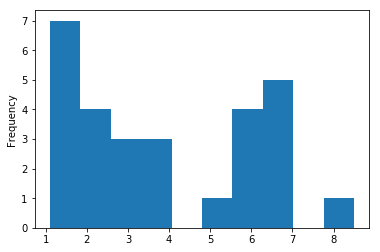

In [36]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [38]:
df.text[0]

'Астрономы, проанализировавшие данные аппарата «Кассини», собранные в ходе финала миссии, смогли дать новые оценки массы и возраста колец Сатурна, которые оказались гораздо моложе, чем считалось ранее. В статье,\xa0опубликованной\xa0в журнале Science, говорится, что их возраст может составлять от 10 до 100 миллионов лет.\xa0 Возраст колец Сатурна является одной из наиболее обсуждаемых проблем в планетологии. По одной из версий они\xa0образовались вместе с планетой 4,5 миллиарда лет назад из ледяных обломков, по другим гораздо позже, когда Сатурн захватил и разрушил крупную комету, кентавра или несколько\xa0ледяных спутников. Для определения возраста колец используются различные методы, основанные на эволюции структур в кольцах, характеристиках движения малых спутников и предположения о том, что поверхность ледяных частиц, составляющих кольца, темнеет со временем. Все эти методы\xa0прямо или косвенно зависят от значений массы колец, оценки которых также разнятся. Ранее считалось, что об

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [39]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [40]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [41]:
df.clean_text[0]

'Астрономы, проанализировавшие данные аппарата «Кассини», собранные в ходе финала миссии, смогли дать новые оценки массы и возраста колец Сатурна, которые оказались гораздо моложе, чем считалось ранее. В статье, опубликованной в журнале Science, говорится, что их возраст может составлять от 10 до 100 миллионов лет.  Возраст колец Сатурна является одной из наиболее обсуждаемых проблем в планетологии. По одной из версий они образовались вместе с планетой 4,5 миллиарда лет назад из ледяных обломков, по другим гораздо позже, когда Сатурн захватил и разрушил крупную комету, кентавра или несколько ледяных спутников. Для определения возраста колец используются различные методы, основанные на эволюции структур в кольцах, характеристиках движения малых спутников и предположения о том, что поверхность ледяных частиц, составляющих кольца, темнеет со временем. Все эти методы прямо или косвенно зависят от значений массы колец, оценки которых также разнятся. Ранее считалось, что общая масса колец со

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [42]:
df.to_excel('nplus-news.xlsx')